In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\UseR\\Downloads\\Documents\\ML Projects\\Logistic Regression\\Bank Customer Churn Prediction.csv")

In [3]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
credit_score,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
products_number,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
credit_card,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
active_member,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimated_salary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
churn,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [63]:
df.corr()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,1.000000,0.005486,0.006513,-0.002624,0.009402,-0.014878,-0.012414,0.016948,-0.014023,0.001682,0.015282,-0.006264
credit_score,0.005486,1.000000,0.008054,-0.002991,-0.003697,0.000664,0.006434,0.012171,-0.005326,0.025445,-0.001037,-0.026002
country,0.006513,0.008054,1.000000,0.004719,0.022881,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
gender,-0.002624,-0.002991,0.004719,1.000000,-0.027664,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
age,0.009402,-0.003697,0.022881,-0.027664,1.000000,-0.009936,0.028275,-0.030707,-0.011697,0.085408,-0.007214,0.285537
tenure,-0.014878,0.000664,0.003739,0.014733,-0.009936,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,-0.012414,0.006434,0.069408,0.012087,0.028275,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.016948,0.012171,0.003972,-0.021859,-0.030707,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.014023,-0.005326,-0.008523,0.005766,-0.011697,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.001682,0.025445,0.006724,0.022544,0.085408,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128


In [8]:
df.drop('customer_id',axis = 1)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

<Axes: xlabel='gender', ylabel='count'>

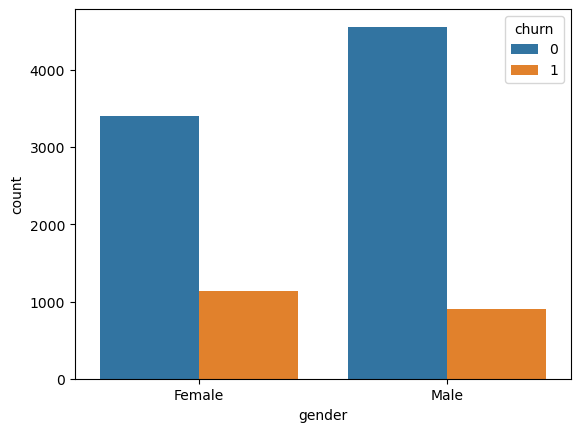

In [10]:
sns.countplot(x = 'gender',hue = 'churn',data = df)

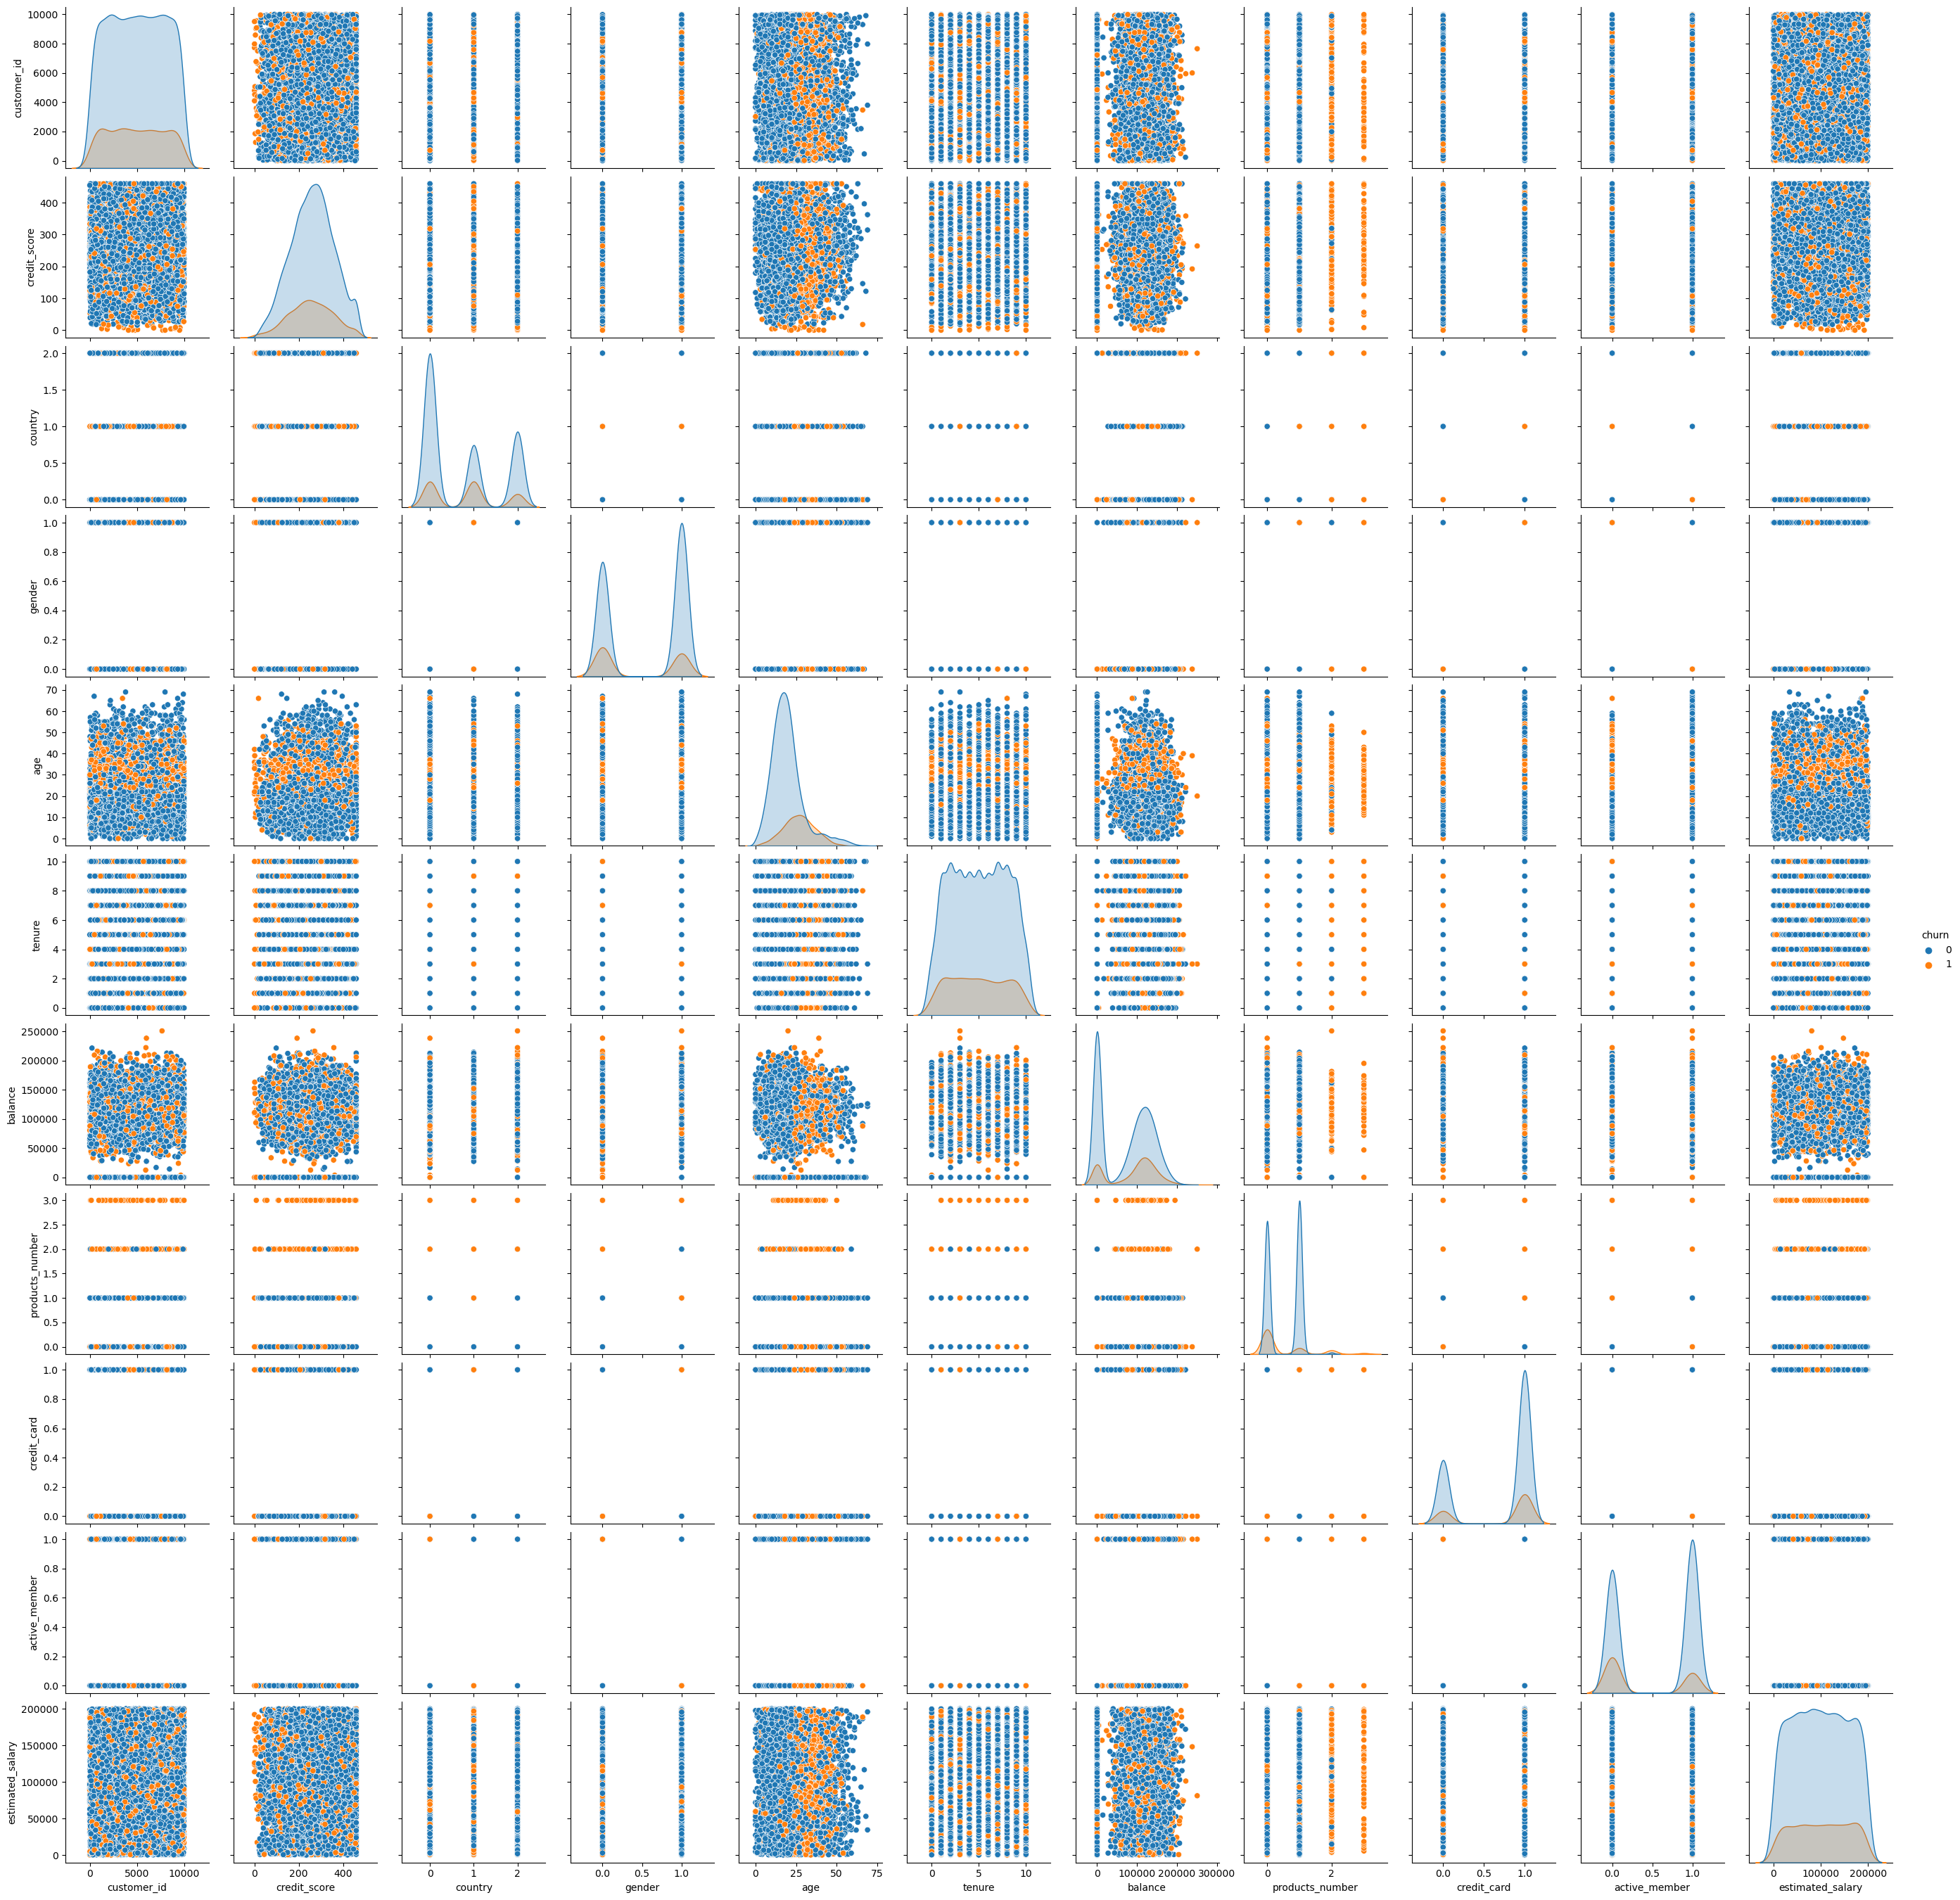

In [59]:
sns.pairplot(df,hue = 'churn')

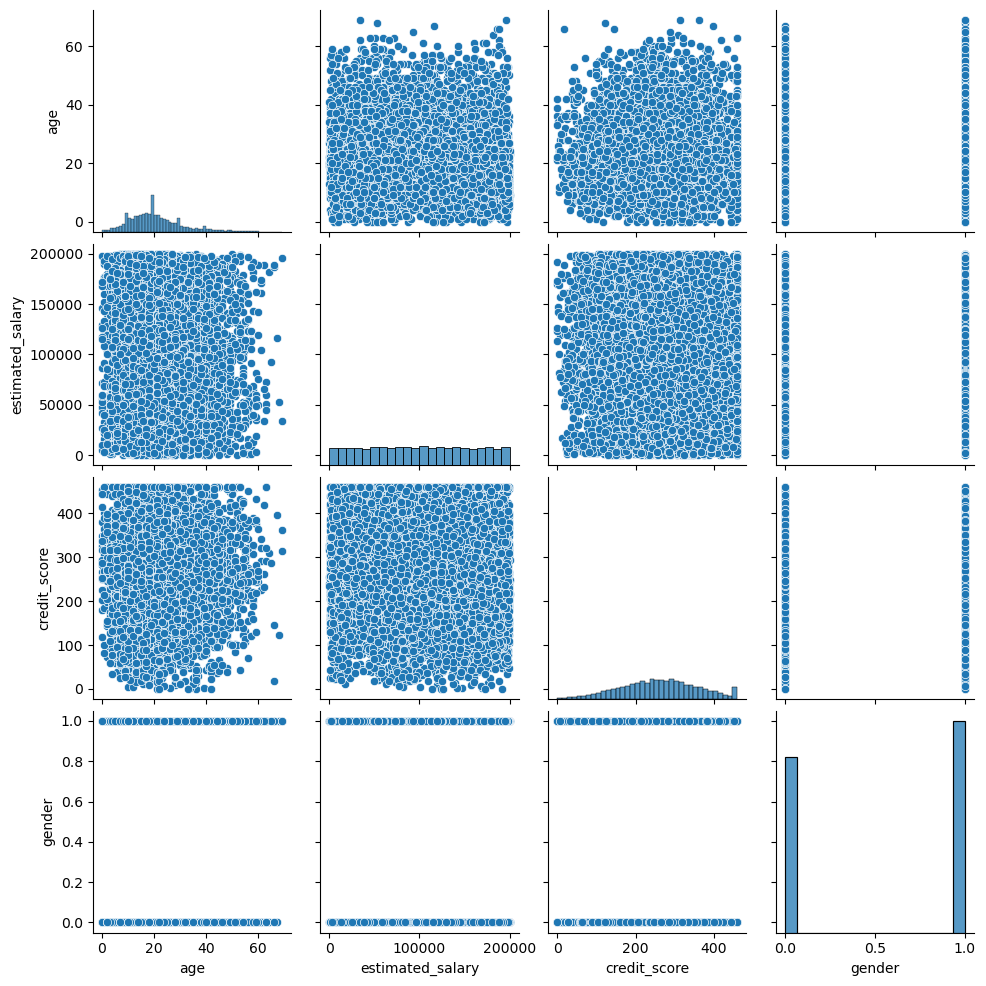

In [60]:
sns.pairplot(df[['age','estimated_salary','credit_score','gender']])

In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column] = LabelEncoder().fit_transform(df[column])
        

In [37]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,2736,228,0,0,24,2,0.00,0,1,1,101348.88,1
1,3258,217,2,0,23,1,83807.86,0,0,1,112542.58,0
2,2104,111,0,0,24,8,159660.80,2,1,0,113931.57,1
3,5435,308,0,0,21,1,0.00,1,0,0,93826.63,0
4,6899,459,2,0,25,2,125510.82,0,1,1,79084.10,0


In [38]:
y = df.iloc[:, -1:]

In [39]:
y.head()

,churn
0,1
1,0
2,1
3,0
4,0


In [40]:
x = df.iloc[:, :-1]
x.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,2736,228,0,0,24,2,0.00,0,1,1,101348.88
1,3258,217,2,0,23,1,83807.86,0,0,1,112542.58
2,2104,111,0,0,24,8,159660.80,2,1,0,113931.57
3,5435,308,0,0,21,1,0.00,1,0,0,93826.63
4,6899,459,2,0,25,2,125510.82,0,1,1,79084.10


In [41]:
from sklearn.model_selection import train_test_split as tts

In [42]:
xtrain,xtest,ytrain,ytest = tts(x,y, test_size = .20, random_state = 42)

In [43]:
xtrain.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
9254,1398,295,0,1,14,6,0.00,1,1,1,179093.26
1561,8021,241,1,1,24,4,119624.60,1,1,1,195978.86
1670,6053,168,2,1,6,3,114739.92,0,1,0,85891.02
6087,6618,170,0,0,9,9,135637.00,0,1,0,153080.40
6669,9292,126,0,1,38,9,142147.32,0,0,0,39488.04


# Apply Algorithm

In [44]:
from sklearn.tree import DecisionTreeClassifier 

In [45]:
dtc = DecisionTreeClassifier()

In [46]:
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [47]:
dtc.score(xtest, ytest)

0.798

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rfc = RandomForestClassifier()

In [50]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier()

In [51]:
rfc.score(xtest,ytest)

0.865

In [52]:
from sklearn.svm import SVC

In [53]:
svm = SVC()

In [54]:
svm.fit(xtrain,ytrain)

SVC()

In [55]:
svm.score(xtest,ytest)

0.8035

# K-Fold Cross Validation

In [56]:
from sklearn.model_selection import cross_val_score

In [57]:
cvs = cross_val_score(rfc,x,y, cv = 10)

In [58]:
cvs

array([0.865, 0.854, 0.876, 0.865, 0.861, 0.84 , 0.861, 0.872, 0.853,
       0.86 ])